In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths

from openpathsampling.analysis.tis_analysis import TISTransition

storage = paths.storage.Storage("toy_tis.nc")
print len(storage.sample)

126


In [2]:
print len(storage.sampleset)

123


In [3]:
print storage.sampleset[0].samples

[<Sample @ 0x10eef1e10>, <Sample @ 0x10eef1110>, <Sample @ 0x10eef1b10>, <Sample @ 0x10eef1b90>, <Sample @ 0x10eef1a10>, <Sample @ 0x10ef02650>]


In [4]:
ensembles=storage.ensemble[:]

In [5]:
ensembles

In [6]:
stateA = ensembles[1].ensembles[2].ensemble.volume.volume1
stateB = ensembles[1].ensembles[2].ensemble.volume.volume2
interfaces = [e.ensembles[1].ensemble2.volume for e in ensembles[1:]]
op = ensembles[1].ensembles[0].ensemble.volume.orderparameter

In [9]:
lmax = [e.ensembles[1].ensemble2.volume.lambda_max for e in ensembles[1:]]
print lmax

[0.0, -0.25, -0.3, -0.2, -0.13]


In [20]:
tis = TISTransition(stateA=stateA, stateB=stateB, orderparameter=op, interfaces=interfaces, storage=storage)

In [22]:
tis.ensembles = ensembles

In [23]:
%%time
tis.all_statistics(samples=storage.sample, weights=None, force=True)

CPU times: user 709 ms, sys: 71.1 ms, total: 780 ms
Wall time: 740 ms


In [24]:
tis.histograms

{'max_lambda': {<openpathsampling.ensemble.SequentialEnsemble at 0x106b65110>: <openpathsampling.analysis.histogram.Histogram at 0x10f7a3a50>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10eef10d0>: <openpathsampling.analysis.histogram.Histogram at 0x10f842a90>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10eef1210>: <openpathsampling.analysis.histogram.Histogram at 0x10f5e98d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10eef1590>: <openpathsampling.analysis.histogram.Histogram at 0x10f842bd0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10eef1690>: <openpathsampling.analysis.histogram.Histogram at 0x10f842b10>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10eef1c50>: <openpathsampling.analysis.histogram.Histogram at 0x10f842c10>},
 'pathlength': {<openpathsampling.ensemble.SequentialEnsemble at 0x106b65110>: <openpathsampling.analysis.histogram.Histogram at 0x10f842a50>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10eef10d0>: <op

In [25]:
#print tis.histograms
# storage.save(tis)

In [26]:
%%time
#storage.sample.cache = {}
#storage.trajectory.cache = {}
for samp in (s for s in storage.sample if s.ensemble==tis.ensembles[1]):
    len(samp.trajectory)

CPU times: user 26.8 ms, sys: 3.93 ms, total: 30.7 ms
Wall time: 28.2 ms


In [27]:
# for sample_set[ssetid], if exists sample in `ensemble`, return list of op(sample.trajectory)
#storage.query_orderparameter_trajectory(orderparameter, ensemble=None, replica=None, step=None, trial=False) #

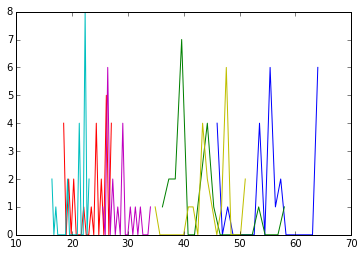

In [28]:
for ens in tis.ensembles:
    myhist = tis.histograms['pathlength'][ens]
    plt.plot(myhist.plot_bins(), myhist.histogram())

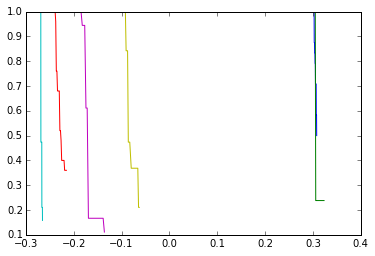

In [30]:

for ens in tis.ensembles:
    myhist = tis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), myhist.reverse_cumulative(1.0))